In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.formula.api as smf
import math

In [16]:
df = pd.read_csv ('Shark Tank India.csv')

In [17]:
df.head()

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,...,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
0,1,1,Badlegi Business Ki Tasveer,1,BluePine Foods,Food,Frozen Momos,https://bluepinefoods.com/,3,2.0,...,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,1,1,Badlegi Business Ki Tasveer,2,Booz Scooters,Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,1,1.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1,1,Badlegi Business Ki Tasveer,3,Heart up my Sleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,1,NaN,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1,2,"Insaan, Ideas Aur Sapne",4,Tagz Foods,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2,2.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1,2,"Insaan, Ideas Aur Sapne",5,Head and Heart,Education,Brain Development Course,https://thehnh.in/,4,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.describe()

,Season Number,Episode Number,Pitch Number,Number of Presenters,Male Presenters,Female Presenters,Couple Presenters,Started in,Yearly Revenue,Monthly Sales,...,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
count,121.0,121.000000,121.000000,121.000000,102.000000,62.000000,120.000000,95.000000,52.000000,6.500000e+01,...,56.000000,56.000000,1.0,53.000000,53.000000,5.000000,13.000000,13.000000,0.0,67.000000
mean,1.0,19.305785,61.000000,2.082645,1.735294,1.209677,0.208333,2018.052632,405.134615,1.455049e+06,...,15.973036,2.932964,50.0,14.899061,5.996981,23.400000,9.999250,3.592308,NaN,2.223881
std,0.0,10.375326,35.073732,0.927243,0.974186,0.483739,0.407819,2.481285,1055.349288,3.167937e+06,...,22.947765,5.810317,NaN,21.192558,13.631118,2.302173,12.378205,5.322352,NaN,1.165422
min,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2005.000000,0.000000,0.000000e+00,...,0.000000,0.000000,50.0,0.000000,0.000000,20.000000,0.000000,0.000000,NaN,1.000000
25%,1.0,11.000000,31.000000,1.000000,1.000000,1.000000,0.000000,2017.000000,53.750000,2.000000e+05,...,0.000000,0.000000,50.0,0.000000,0.000000,22.000000,0.000000,0.000000,NaN,1.000000
50%,1.0,19.000000,61.000000,2.000000,1.000000,1.000000,0.000000,2019.000000,112.500000,5.500000e+05,...,3.500008,0.875000,50.0,8.330000,1.000000,25.000000,0.000253,1.000000,NaN,2.000000
75%,1.0,28.000000,91.000000,3.000000,2.000000,1.000000,0.000000,2020.000000,255.500000,1.600000e+06,...,25.000000,4.250000,50.0,25.000000,5.000000,25.000000,20.000000,5.000000,NaN,3.000000
max,1.0,36.000000,121.000000,6.000000,6.000000,3.000000,1.000000,2022.000000,7200.000000,2.000000e+07,...,100.000000,40.000000,50.0,100.000000,75.000000,25.000000,33.330000,17.500000,NaN,5.000000


In [19]:
df.columns

Index(['Season Number', 'Episode Number', 'Episode Title', 'Pitch Number',
       'Startup Name', 'Industry', 'Business Description', 'Company Website',
       'Number of Presenters', 'Male Presenters', 'Female Presenters',
       'Couple Presenters', 'Pitchers Average Age', 'Started in',
       'Pitchers City', 'Pitchers State', 'Yearly Revenue', 'Monthly Sales',
       'Gross Margin', 'Original Ask Amount', 'Original Ask Equity',
       'Valuation Requested', 'Received Offer', 'Accepted Offer',
       'Total Deal Amount', 'Total Deal Equity', 'Total Deal Debt',
       'Valuation Offered', 'Ashneer Investment Amount',
       'Ashneer Investment Equity', 'Ashneer Debt Amount',
       'Namita Investment Amount', 'Namita Investment Equity',
       'Namita Debt Amount', 'Anupam Investment Amount',
       'Anupam Investment Equity', 'Anupam Debt Amount',
       'Vineeta Investment Amount', 'Vineeta Investment Equity',
       'Vineeta Debt Amount', 'Aman Investment Amount',
       'Aman Inv

<AxesSubplot:ylabel='Original Ask Equity'>

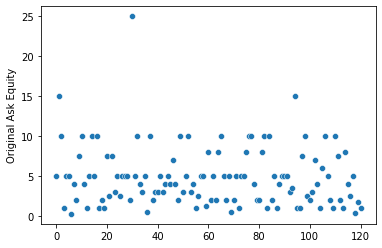

In [20]:
sns.scatterplot(data=df['Original Ask Equity'])

this scatterplot shows that there are a few outliers in terms of the original ask for equity and them being 15 and 25, but rest of the offers lied in abou the sam amount of percentage meaning 0-10

<AxesSubplot:xlabel='Gross Margin', ylabel='Count'>

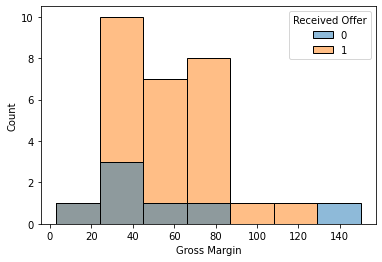

In [21]:
sns.histplot(data=df, x="Gross Margin", hue="Received Offer")

this shows us that businesses from 20,00,000 INR - 1,30,00,000 INR of gross margins recieved offers, however few comparitively from about 5,000-90,00,000 INR didnt, and none did beyounf 1,30,00,000 INR.

<AxesSubplot:xlabel='Ashneer Investment Amount', ylabel='Peyush Investment Amount'>

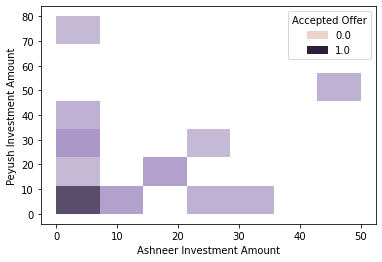

In [22]:
sns.histplot(df, x="Ashneer Investment Amount", y="Peyush Investment Amount", hue = 'Accepted Offer')

<AxesSubplot:xlabel='Total Deal Equity', ylabel='Count'>

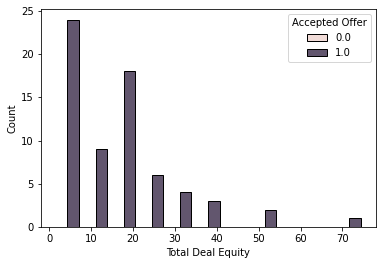

In [23]:
sns.histplot(data=df, x="Total Deal Equity", hue="Accepted Offer", multiple="dodge", shrink=.8)

/Users/kritikasaini/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


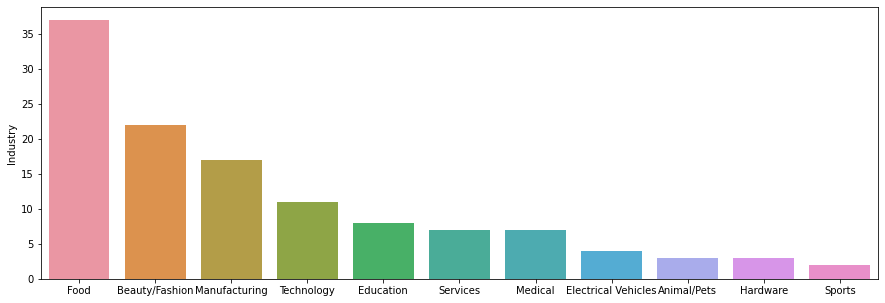

In [24]:
i=df["Industry"].value_counts()
plt.figure(figsize=(15,5))
ax=sns.barplot(ind.index,i)


Going to build on more data like this. Confused whether I should dig in further for indivudual investors or not. Or should i go in for male and female entrepreneurs instead. also, what other kind of visualisation techniques should i be looking into. 

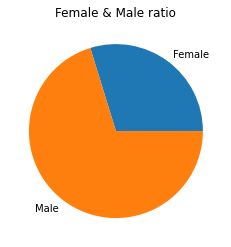

In [31]:
#presenter_g=[50,150]
labels=['Female','Male']
plt.pie(presenter_g, labels = labels)
plt.title("Female & Male ratio")
plt.show()
#plt.savefig('fig2.png')

TypeError: text() missing 1 required positional argument: 's'

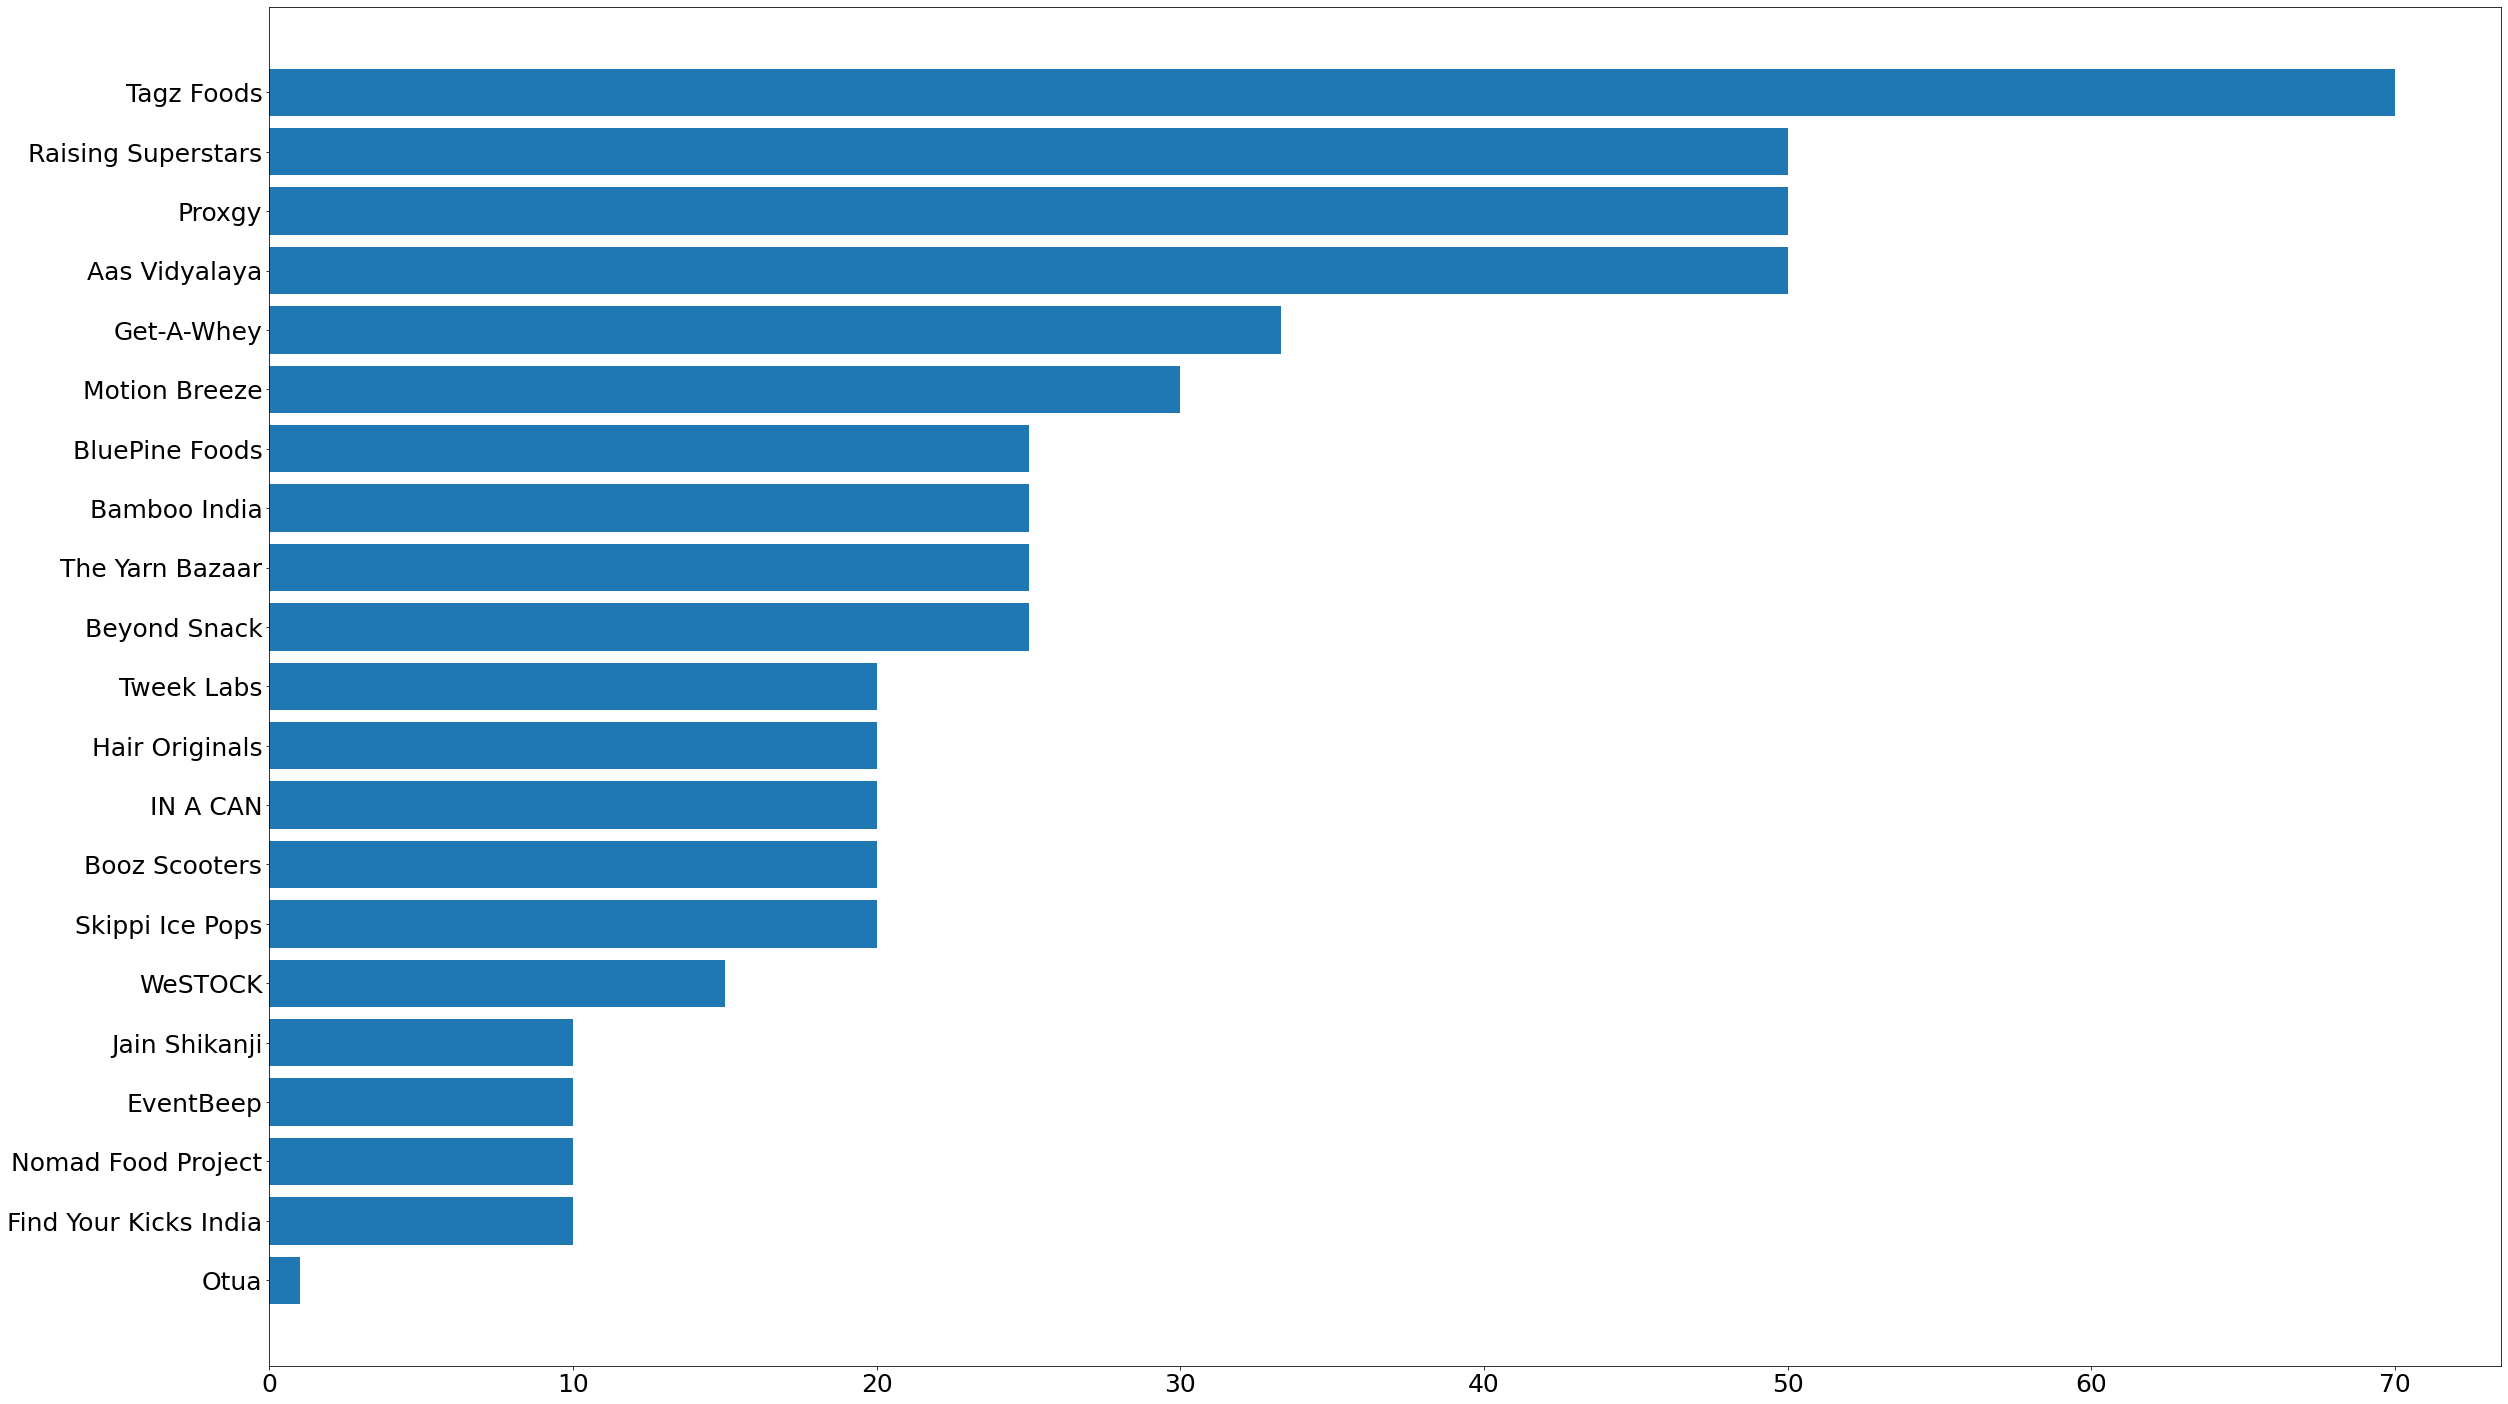

In [44]:
ash_amount=df.loc[(df["Ashneer Investment Amount"].isnull()==False)&(df["Ashneer Investment Amount"]!=0)]
ashneer = ash_amount.sort_values('Ashneer Investment Amount')
plt.figure(figsize=(40,25))
plt.barh(ashneer["Startup Name"],ashneer["Ashneer Investment Amount"])
for i, j in enumerate(Ashneer["Ashneer Investment Amount"]):
    plt.text(j, i)
plt.title("Ashneer Investment Amount")

Text(0.5, 1.0, 'Industry')

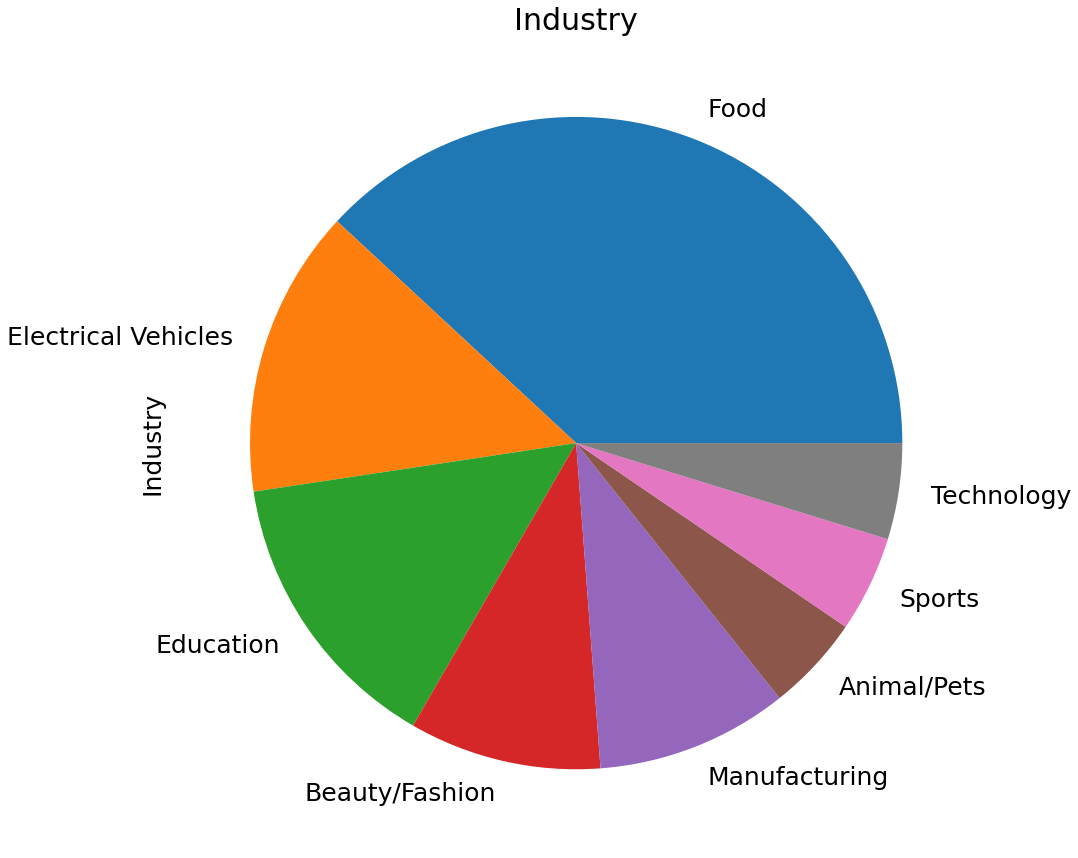

In [50]:
ash_amount=df.loc[(df["Ashneer Investment Amount"].isnull()==False)&(df["Ashneer Investment Amount"]!=0)]
ashneer = ash_amount.sort_values('Ashneer Investment Amount')
plt.figure(figsize=(30,15))
Ashneer["Industry"].value_counts().plot(kind='pie')
plt.title("Industry")

<AxesSubplot:xlabel='Received Offer', ylabel='count'>

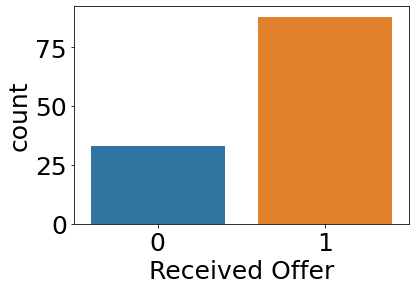

In [52]:
sns.countplot(x='Received Offer', data=df)